In [5]:
#libraries
import matplotlib.pyplot as plt
import pandas as pd
from utils import utils as utils
import seaborn as sns
from statistics import mean,median

#data
finalized_dataset = pd.read_csv('../data/arabic_dataset.csv', index_col=0)

In [6]:
#renaming some columns in order to have the same column names on all datasets
finalized_dataset = finalized_dataset.rename(columns={'Number of Question': 'Question_Nr', 'label': 'Labels', 'Responses':'Response'})

columns:  Index(['Question', 'Right_Answer', 'Grade', 'Number', 'Responses',
       'Number of Question', 'label'],
      dtype='object')


In [8]:
#check for nan values
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      finalized_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132 entries, 0 to 2131
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Question      2132 non-null   object 
 1   Right_Answer  2132 non-null   object 
 2   Grade         2132 non-null   float64
 3   Number        2132 non-null   object 
 4   Response      2132 non-null   object 
 5   Question_Nr   2132 non-null   int64  
 6   Labels        2132 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 133.2+ KB


In [10]:
finalized_dataset.describe()
#We have 48 questions and labels 0,1
#However, we see that the max grade in Grade column is 875, should be 5.

,Grade,Question_Nr,Labels
count,2132.000000,2132.000000,2132.000000
mean,3.311210,24.960600,0.660882
std,18.939414,13.892574,0.473521
min,0.000000,1.000000,0.000000
25%,1.750000,13.000000,0.000000
50%,3.000000,26.000000,1.000000
75%,4.000000,37.000000,1.000000
max,875.000000,48.000000,1.000000


In [11]:
finalized_dataset.loc[
    finalized_dataset.Grade == 875
] #row 394 contains outlier, remove

[3.000e+00 5.000e+00 2.625e+00 4.000e+00 3.500e+00 3.750e+00 4.500e+00
 3.625e+00 4.250e+00 2.500e+00 7.500e-01 2.250e+00 4.750e+00 3.250e+00
 2.750e+00 1.250e+00 3.875e+00 1.750e+00 1.000e+00 1.500e+00 2.000e+00
 2.500e-01 0.000e+00 5.000e-01 2.125e+00 2.875e+00 3.375e+00 8.750e+02
 1.375e+00 1.625e+00 1.125e+00 4.375e+00 3.125e+00]


,Question,Right_Answer,Grade,Number,Response,Question_Nr,Labels
394,ماهي الأسس التي يجب إتباعها للحد من انتشار ال...,ثقافة أمن المعلومات، التشريع القانوني، التربي...,875.0,[1],ماديا: توفير العتاد اللازم لتأمين مصادر المعلو...,10,1


In [12]:
finalized_dataset = finalized_dataset.loc[
    finalized_dataset.Grade != 875
]

In [13]:
finalized_dataset.describe() #875 outlier removed

,Grade,Question_Nr,Labels
count,2131.000000,2131.000000,2131.000000
mean,2.902159,24.967621,0.660723
std,1.403347,13.892051,0.473575
min,0.000000,1.000000,0.000000
25%,1.750000,13.000000,0.000000
50%,3.000000,26.000000,1.000000
75%,4.000000,37.000000,1.000000
max,5.000000,48.000000,1.000000


In [14]:
#class balance
print(finalized_dataset.Labels.value_counts())

1    1408
0     723
Name: Labels, dtype: int64


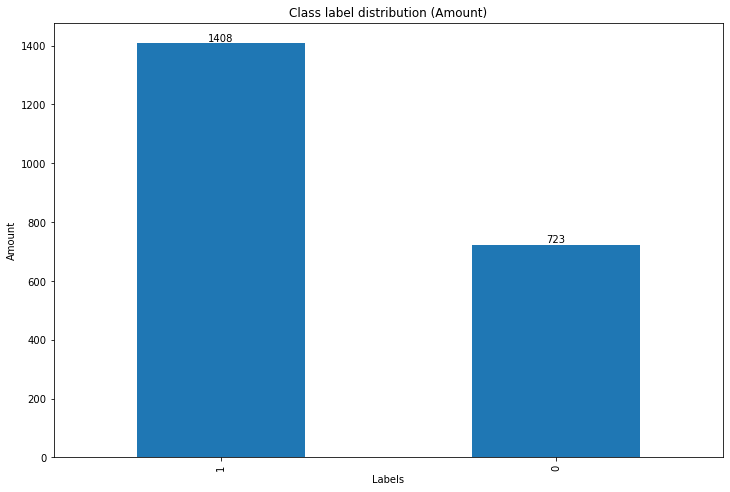

In [15]:
#Class balance (plot)
total_labels = finalized_dataset.Labels.value_counts()
x_labels = [1,0]

plt.figure(figsize=(12,8))
ax = total_labels.plot(kind='bar')
ax.set_title('Class label distribution (Amount)')
ax.set_xlabel('Labels')
ax.set_ylabel('Amount')
ax.set_xticklabels(x_labels)

rects = ax.patches

for rect,lbl in zip(rects, total_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height
            , lbl, ha='center', va='bottom')

#About 67/33 ratio class balance towards high-grade class

<AxesSubplot:xlabel='Question_Nr'>

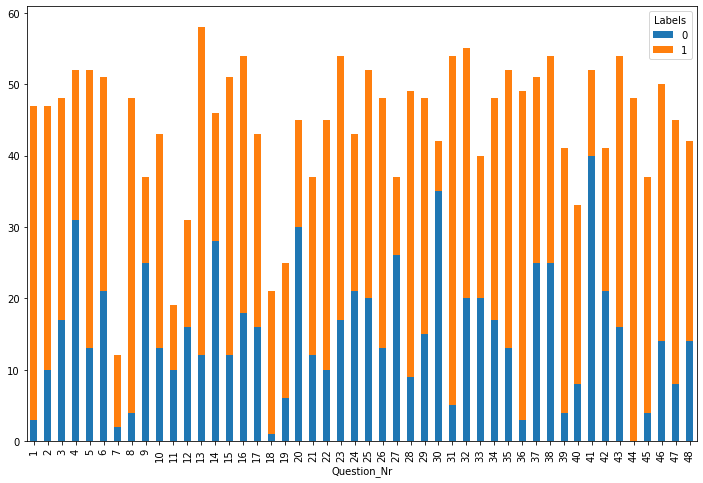

In [16]:
#balance per question (plot)
class_imbalance = finalized_dataset.groupby('Question_Nr').Labels.value_counts()
class_imbalance.unstack().plot(kind='bar', stacked=True, figsize=(12,8))

In [17]:
#Top 10 most supported and most balanced questions
questions_n_fractions_n_support = []
#get fractions from middle (the closer to 0 the more balanced)
for question_nr,values in class_imbalance.groupby(level=0):
    if len(values) != 2:
        continue #ignore questions with only support of one class
    neg = values.iloc[0]
    pos = values.iloc[1]
    fraction_from_middle = abs((pos/(neg+pos))-0.5) #the closer to 0 the better class balance
    total_support = neg+pos
    questions_n_fractions_n_support.append([question_nr, fraction_from_middle,total_support])

FRACTIONS_INDEX = 1 #fractions on index 1 of list
SUPPORT_INDEX = 2 #support on index 2 of list
#sort fractions
from operator import itemgetter
sorted_fractions = sorted(questions_n_fractions_n_support, key=itemgetter(FRACTIONS_INDEX))
sorted_supports = sorted(questions_n_fractions_n_support, key=itemgetter(SUPPORT_INDEX),reverse=True)

print('Top 10 balanced questions:')
for i in range(0, 10):
    print(sorted_fractions[i])
print('\nTop 10 highest supported questions:')
for i in range(0, 10):
    print(sorted_supports[i])

Top 10 balanced questions:
[33, 0.0, 40]
[37, 0.009803921568627472, 51]
[24, 0.011627906976744207, 43]
[42, 0.012195121951219523, 41]
[12, 0.016129032258064502, 31]
[11, 0.026315789473684237, 19]
[38, 0.037037037037037035, 54]
[6, 0.08823529411764708, 51]
[4, 0.09615384615384615, 52]
[14, 0.10869565217391303, 46]

Top 10 highest supported questions:
[13, 0.2931034482758621, 58]
[32, 0.13636363636363635, 55]
[16, 0.16666666666666669, 54]
[23, 0.18518518518518517, 54]
[31, 0.40740740740740744, 54]
[38, 0.037037037037037035, 54]
[43, 0.20370370370370372, 54]
[4, 0.09615384615384615, 52]
[5, 0.25, 52]
[25, 0.11538461538461536, 52]


In [18]:
#Word distribution
all_responses = finalized_dataset.Response
response_lengths = utils.get_text_word_lengths(all_responses)
pd.Series(response_lengths).hist(bins = 30)
utils.print_list_stats(response_lengths)

In [20]:
#Character distribution?
character_lengths = utils.get_text_character_lengths(all_responses)
pd.Series(character_lengths).hist(bins = 30)
utils.print_list_stats(character_lengths)

In [ ]:
#Word distribution per class
neg_responses = finalized_dataset.loc[finalized_dataset.Labels == 0].Response
pos_responses = finalized_dataset.loc[finalized_dataset.Labels == 1].Response

neg_resp_dist = utils.get_text_word_lengths(neg_responses)
pos_resp_dist = utils.get_text_word_lengths(pos_responses)

In [22]:
print('Average response length of low graders: ', mean(neg_resp_dist))
print('Average response length of high graders: ', mean(pos_resp_dist))
print('Median response length of low graders: ', median(neg_resp_dist))
print('Median response length of high graders: ', median(pos_resp_dist))

Average response length of low graders:  15.835408022130014
Average response length of high graders:  21.28409090909091
Median response length of low graders:  15
Median response length of high graders:  20.0


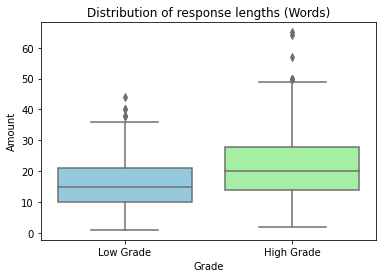

In [23]:
boxplot = sns.boxplot(data=[neg_resp_dist,pos_resp_dist],palette=['skyblue','palegreen'])
boxplot.axes.set_title("Distribution of response lengths (Words)")
boxplot.set_xlabel("Grade")
boxplot.set_ylabel("Amount")
plt.xticks([0,1],('Low Grade', 'High Grade'))
plt.show()

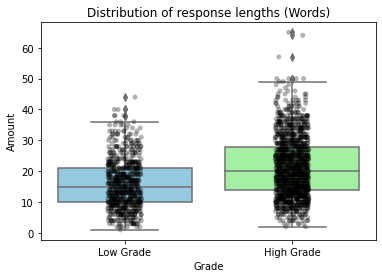

In [24]:
boxplot = sns.boxplot(data=[neg_resp_dist,pos_resp_dist],palette=['skyblue','palegreen'])
boxplot = sns.stripplot(data=[neg_resp_dist,pos_resp_dist], marker="o", alpha=0.3, color="black")
boxplot.axes.set_title("Distribution of response lengths (Words)")
boxplot.set_xlabel("Grade")
boxplot.set_ylabel("Amount")
plt.xticks([0,1],('Low Grade', 'High Grade'))
plt.show()